<a href="https://colab.research.google.com/github/LeoncioMD/Examen/blob/main/lastmile_delivery_operations_mit_lift_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
files.upload()
#Cargar desde un archivo .csv sin indice
data=pd.read_csv('lastmile_delivery_operations_mit_lift_lab.csv')
#verificamos info del data frame 
data.info()

Saving lastmile_delivery_operations_mit_lift_lab.csv to lastmile_delivery_operations_mit_lift_lab.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   _record_id                                     182 non-null    object 
 1   _title                                         176 non-null    object 
 2   _server_updated_at                             182 non-null    object 
 3   _updated_by                                    182 non-null    object 
 4   _geometry                                      182 non-null    object 
 5   _latitude                                      182 non-null    float64
 6   _longitude                                     182 non-null    float64
 7   arrival_of_the_freight_vehicle                 182 non-null    object 
 8   plates                      

In [3]:
#corroboramos valores nulos 
valores_nulos=data.isnull().sum()
valores_nulos

_record_id                                         0
_title                                             6
_server_updated_at                                 0
_updated_by                                        0
_geometry                                          0
_latitude                                          0
_longitude                                         0
arrival_of_the_freight_vehicle                     0
plates                                             1
company_if_visible                                73
visit_purpose                                      0
type_of_vehicle                                    0
number_of_operators                                0
refrigerated_truck                                 0
type_of_cargo                                      0
picture_of_the_parked_freight_vehicle              0
departure_of_the_freight_vehicle                   0
where_was_the_vehicle_parked                       0
while_parked_was_the_engine_running           

Sustucion de valores nulos 
en esta parte sustituiremos todos los valores nulos del data frame ocupando los metodos de backward y forward, es decir que se llenaran con los datos anteriores o posteriores y sespues comprobaremos que se hayan limpiado los datos 

In [8]:
#Remplazamos valores nulos del df comn "bfill"
data2=data.fillna(method="bfill")
data2

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,arrival_of_the_freight_vehicle,plates,company_if_visible,...,used_traffic_cone,vehicles_unloading_door,number_of_available_trolleys,serving_customer,garage_blocking,accident,describe_the_accident,noise,traffic_congestion,maximum_number_of_vehicles_in_the_traffic_jam
0,4408a234-9585-46fe-9b16-96c0faaf6db8,73 Calle Almolonga\nPuebla de Zaragoza PUE 721...,2022-11-12 22:15:04 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2334894708 19.0568933787),19.056893,-98.233489,14:00,KB-7050-A,Ricolino,...,no,Side,1,1.0,yes,no,NaN,no,no,8.0
1,673cd0e3-7290-4c4d-a57f-096d16b78141,72 Calle Almolonga\nPuebla de Zaragoza PUE 721...,2022-11-12 20:41:39 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.233483903 19.0568494313),19.056849,-98.233484,13:50,XC8687A,Marinela,...,no,Rear,1,1.0,no,no,NaN,no,no,8.0
2,04e64464-3fbd-4ce1-99d8-5364e1567e8c,4510 Vía Volkswagen\nHeroica Puebla de Zaragoz...,2022-11-12 18:02:57 UTC,Juan Carlos Bejarano Moreno,SRID=4326;POINT(-98.2339161 19.0596775),19.059677,-98.233916,11:47,SM 20745,La fete,...,no,Side,0,1.0,no,no,NaN,no,no,8.0
3,d0a6568d-cf8f-48fd-ad3d-007e79f4ae6b,4501A Avenida 2 Poniente\nHeroica Puebla de Za...,2022-11-12 17:55:44 UTC,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.2285674 19.0626948),19.062695,-98.228567,11:45,SP35169,Barcel,...,no,Rear,2,1.0,yes,no,NaN,no,no,8.0
4,eff15823-b1f2-4e82-afb2-2195635d1406,4717 Avenida Reforma\nHeroica Puebla de Zarago...,2022-11-12 17:55:44 UTC,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.231397 19.0627239),19.062724,-98.231397,11:41,SN89460,Agua inmaculada,...,no,Rear,2,1.0,no,no,NaN,no,no,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,f964004e-67a0-4b75-b2b0-ce04b9f0b344,406-B Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:54:56 UTC,José Oropeza,SRID=4326;POINT(-98.194933077 19.043612116),19.043612,-98.194933,10:36,HL-3785-F,Infra,...,no,Rear,0,NaN,no,no,NaN,no,no,NaN
178,5656a189-19f5-45a7-b53b-1a3db0de6571,406-B Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:54:56 UTC,José Oropeza,SRID=4326;POINT(-98.1948560508 19.0436070826),19.043607,-98.194856,10:33,SP-29-798,Infra,...,no,Side,0,NaN,no,no,NaN,no,no,NaN
179,bcbd462b-4c63-490b-bfec-0ef6657ead73,406-B Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:54:44 UTC,Emilio Garza,SRID=4326;POINT(-98.1945033093 19.043335537),19.043336,-98.194503,11:19,05-AP-6G,Infra,...,no,Rear,1,NaN,no,no,NaN,no,no,NaN
180,cd9ba76d-d899-4d87-9512-486aedb1b149,402E Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:14:09 UTC,Emilio Garza,SRID=4326;POINT(-98.1948728731 19.0435760418),19.043576,-98.194873,11:03,LE-88-707,Alpura,...,no,Rear,0,NaN,no,no,NaN,no,no,NaN


In [9]:
#Remplazamos valores nulos del df comn "ffill"
data2=data.fillna(method="ffill")
data2

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,arrival_of_the_freight_vehicle,plates,company_if_visible,...,used_traffic_cone,vehicles_unloading_door,number_of_available_trolleys,serving_customer,garage_blocking,accident,describe_the_accident,noise,traffic_congestion,maximum_number_of_vehicles_in_the_traffic_jam
0,4408a234-9585-46fe-9b16-96c0faaf6db8,73 Calle Almolonga\nPuebla de Zaragoza PUE 721...,2022-11-12 22:15:04 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2334894708 19.0568933787),19.056893,-98.233489,14:00,KB-7050-A,Ricolino,...,no,Side,1,NaN,yes,no,NaN,no,no,NaN
1,673cd0e3-7290-4c4d-a57f-096d16b78141,72 Calle Almolonga\nPuebla de Zaragoza PUE 721...,2022-11-12 20:41:39 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.233483903 19.0568494313),19.056849,-98.233484,13:50,XC8687A,Marinela,...,no,Rear,1,NaN,no,no,NaN,no,no,NaN
2,04e64464-3fbd-4ce1-99d8-5364e1567e8c,4510 Vía Volkswagen\nHeroica Puebla de Zaragoz...,2022-11-12 18:02:57 UTC,Juan Carlos Bejarano Moreno,SRID=4326;POINT(-98.2339161 19.0596775),19.059677,-98.233916,11:47,SM 20745,La fete,...,no,Side,0,1.0,no,no,NaN,no,no,NaN
3,d0a6568d-cf8f-48fd-ad3d-007e79f4ae6b,4501A Avenida 2 Poniente\nHeroica Puebla de Za...,2022-11-12 17:55:44 UTC,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.2285674 19.0626948),19.062695,-98.228567,11:45,SP35169,Barcel,...,no,Rear,2,1.0,yes,no,NaN,no,no,NaN
4,eff15823-b1f2-4e82-afb2-2195635d1406,4717 Avenida Reforma\nHeroica Puebla de Zarago...,2022-11-12 17:55:44 UTC,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.231397 19.0627239),19.062724,-98.231397,11:41,SN89460,Barcel,...,no,Rear,2,1.0,no,no,NaN,no,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,f964004e-67a0-4b75-b2b0-ce04b9f0b344,6 Avenida 5 Poniente\nPuebla PUE 72000\nMX,2022-11-03 17:54:56 UTC,José Oropeza,SRID=4326;POINT(-98.194933077 19.043612116),19.043612,-98.194933,10:36,HL-3785-F,no,...,no,Rear,0,1.0,no,no,NaN,no,no,2.0
178,5656a189-19f5-45a7-b53b-1a3db0de6571,6 Avenida 5 Poniente\nPuebla PUE 72000\nMX,2022-11-03 17:54:56 UTC,José Oropeza,SRID=4326;POINT(-98.1948560508 19.0436070826),19.043607,-98.194856,10:33,SP-29-798,no,...,no,Side,0,1.0,no,no,NaN,no,no,2.0
179,bcbd462b-4c63-490b-bfec-0ef6657ead73,406-B Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:54:44 UTC,Emilio Garza,SRID=4326;POINT(-98.1945033093 19.043335537),19.043336,-98.194503,11:19,05-AP-6G,Infra,...,no,Rear,1,1.0,no,no,NaN,no,no,2.0
180,cd9ba76d-d899-4d87-9512-486aedb1b149,402E Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:14:09 UTC,Emilio Garza,SRID=4326;POINT(-98.1948728731 19.0435760418),19.043576,-98.194873,11:03,LE-88-707,Alpura,...,no,Rear,0,1.0,no,no,NaN,no,no,2.0


In [24]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
data2["serving_customer"]=data2["serving_customer"].fillna(method="bfill")

In [23]:

#Sustituir valores nulos por un valor numerico en concreto
data2["describe_the_accident"]=data2["describe_the_accident"].fillna('N/A')

In [25]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
data2["maximum_number_of_vehicles_in_the_traffic_jam"]=data2["maximum_number_of_vehicles_in_the_traffic_jam"].fillna(method="bfill")

In [26]:
#Corroboramos valores nulos 
valores_nulos=data2.isnull().sum()
valores_nulos

_record_id                                       0
_title                                           0
_server_updated_at                               0
_updated_by                                      0
_geometry                                        0
_latitude                                        0
_longitude                                       0
arrival_of_the_freight_vehicle                   0
plates                                           0
company_if_visible                               0
visit_purpose                                    0
type_of_vehicle                                  0
number_of_operators                              0
refrigerated_truck                               0
type_of_cargo                                    0
picture_of_the_parked_freight_vehicle            0
departure_of_the_freight_vehicle                 0
where_was_the_vehicle_parked                     0
while_parked_was_the_engine_running              0
used_traffic_cone              

In [27]:
#Remplazamos valores nulos del df con mean
#Realizamos la copia del dataframe
data2=data.copy()
data2=data2.fillna(round(data.mean(),1))
data2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,arrival_of_the_freight_vehicle,plates,company_if_visible,...,used_traffic_cone,vehicles_unloading_door,number_of_available_trolleys,serving_customer,garage_blocking,accident,describe_the_accident,noise,traffic_congestion,maximum_number_of_vehicles_in_the_traffic_jam
0,4408a234-9585-46fe-9b16-96c0faaf6db8,73 Calle Almolonga\nPuebla de Zaragoza PUE 721...,2022-11-12 22:15:04 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2334894708 19.0568933787),19.056893,-98.233489,14:00,KB-7050-A,Ricolino,...,no,Side,1,1.0,yes,no,NaN,no,no,5.0
1,673cd0e3-7290-4c4d-a57f-096d16b78141,72 Calle Almolonga\nPuebla de Zaragoza PUE 721...,2022-11-12 20:41:39 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.233483903 19.0568494313),19.056849,-98.233484,13:50,XC8687A,Marinela,...,no,Rear,1,1.0,no,no,NaN,no,no,5.0
2,04e64464-3fbd-4ce1-99d8-5364e1567e8c,4510 Vía Volkswagen\nHeroica Puebla de Zaragoz...,2022-11-12 18:02:57 UTC,Juan Carlos Bejarano Moreno,SRID=4326;POINT(-98.2339161 19.0596775),19.059677,-98.233916,11:47,SM 20745,La fete,...,no,Side,0,1.0,no,no,NaN,no,no,5.0
3,d0a6568d-cf8f-48fd-ad3d-007e79f4ae6b,4501A Avenida 2 Poniente\nHeroica Puebla de Za...,2022-11-12 17:55:44 UTC,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.2285674 19.0626948),19.062695,-98.228567,11:45,SP35169,Barcel,...,no,Rear,2,1.0,yes,no,NaN,no,no,5.0
4,eff15823-b1f2-4e82-afb2-2195635d1406,4717 Avenida Reforma\nHeroica Puebla de Zarago...,2022-11-12 17:55:44 UTC,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.231397 19.0627239),19.062724,-98.231397,11:41,SN89460,NaN,...,no,Rear,2,1.0,no,no,NaN,no,no,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,f964004e-67a0-4b75-b2b0-ce04b9f0b344,NaN,2022-11-03 17:54:56 UTC,José Oropeza,SRID=4326;POINT(-98.194933077 19.043612116),19.043612,-98.194933,10:36,HL-3785-F,NaN,...,no,Rear,0,1.0,no,no,NaN,no,no,5.0
178,5656a189-19f5-45a7-b53b-1a3db0de6571,NaN,2022-11-03 17:54:56 UTC,José Oropeza,SRID=4326;POINT(-98.1948560508 19.0436070826),19.043607,-98.194856,10:33,SP-29-798,NaN,...,no,Side,0,1.0,no,no,NaN,no,no,5.0
179,bcbd462b-4c63-490b-bfec-0ef6657ead73,406-B Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:54:44 UTC,Emilio Garza,SRID=4326;POINT(-98.1945033093 19.043335537),19.043336,-98.194503,11:19,05-AP-6G,Infra,...,no,Rear,1,1.0,no,no,NaN,no,no,5.0
180,cd9ba76d-d899-4d87-9512-486aedb1b149,402E Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:14:09 UTC,Emilio Garza,SRID=4326;POINT(-98.1948728731 19.0435760418),19.043576,-98.194873,11:03,LE-88-707,Alpura,...,no,Rear,0,1.0,no,no,NaN,no,no,5.0


Valores atipicos

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 1080x576 with 0 Axes>

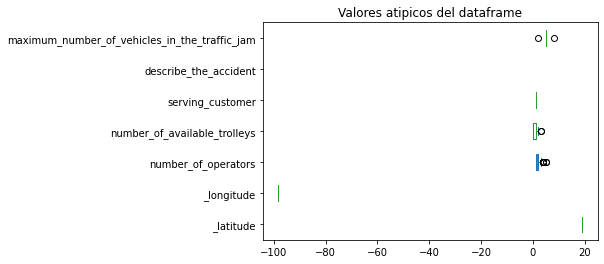

In [28]:
#realizamos diagrama de caja o bigote de cada columna 
fig=plt.figure(figsize=(15,8))
data2.plot(kind='box',vert=False)
plt.title("Valores atipicos del dataframe")
plt.show()

In [29]:
#Metodo aplicando la desviacion estandar. eencontramos los valores extremos 
y=data2
Limite_superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite Inferior permitido", Limite_Inferior)

Limite superior permitido _latitude                                        19.112587
_longitude                                      -98.109219
number_of_operators                               4.236537
number_of_available_trolleys                      2.881871
serving_customer                                  1.000000
describe_the_accident                                  NaN
maximum_number_of_vehicles_in_the_traffic_jam     5.946059
dtype: float64
Limite Inferior permitido _latitude                                        18.967026
_longitude                                      -98.361737
number_of_operators                              -0.884889
number_of_available_trolleys                     -1.530223
serving_customer                                  1.000000
describe_the_accident                                  NaN
maximum_number_of_vehicles_in_the_traffic_jam     4.053941
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [30]:
#EEncontramos los outlieas de data frame 
outliers=data2[(y>Limite_superior)|(y<Limite_Inferior)]
outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,arrival_of_the_freight_vehicle,plates,company_if_visible,...,used_traffic_cone,vehicles_unloading_door,number_of_available_trolleys,serving_customer,garage_blocking,accident,describe_the_accident,noise,traffic_congestion,maximum_number_of_vehicles_in_the_traffic_jam
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Obtenemos datos y los outliers se convierten en nulos del df
data3=data2[(y<=Limite_superior)&(y>=Limite_Inferior)]
data3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,arrival_of_the_freight_vehicle,plates,company_if_visible,...,used_traffic_cone,vehicles_unloading_door,number_of_available_trolleys,serving_customer,garage_blocking,accident,describe_the_accident,noise,traffic_congestion,maximum_number_of_vehicles_in_the_traffic_jam
0,NaN,NaN,NaN,NaN,NaN,19.056893,-98.233489,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
1,NaN,NaN,NaN,NaN,NaN,19.056849,-98.233484,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
2,NaN,NaN,NaN,NaN,NaN,19.059677,-98.233916,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
3,NaN,NaN,NaN,NaN,NaN,19.062695,-98.228567,NaN,NaN,NaN,...,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
4,NaN,NaN,NaN,NaN,NaN,19.062724,-98.231397,NaN,NaN,NaN,...,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,NaN,NaN,NaN,NaN,NaN,19.043612,-98.194933,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
178,NaN,NaN,NaN,NaN,NaN,19.043607,-98.194856,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
179,NaN,NaN,NaN,NaN,NaN,19.043336,-98.194503,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
180,NaN,NaN,NaN,NaN,NaN,19.043576,-98.194873,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0


In [32]:
#Remlazamos valores atipico (nulos) del df con "mean"
#Realizamos una copia del df
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data.mean(),1))
data_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,arrival_of_the_freight_vehicle,plates,company_if_visible,...,used_traffic_cone,vehicles_unloading_door,number_of_available_trolleys,serving_customer,garage_blocking,accident,describe_the_accident,noise,traffic_congestion,maximum_number_of_vehicles_in_the_traffic_jam
0,NaN,NaN,NaN,NaN,NaN,19.056893,-98.233489,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
1,NaN,NaN,NaN,NaN,NaN,19.056849,-98.233484,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
2,NaN,NaN,NaN,NaN,NaN,19.059677,-98.233916,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
3,NaN,NaN,NaN,NaN,NaN,19.062695,-98.228567,NaN,NaN,NaN,...,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
4,NaN,NaN,NaN,NaN,NaN,19.062724,-98.231397,NaN,NaN,NaN,...,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,NaN,NaN,NaN,NaN,NaN,19.043612,-98.194933,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
178,NaN,NaN,NaN,NaN,NaN,19.043607,-98.194856,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
179,NaN,NaN,NaN,NaN,NaN,19.043336,-98.194503,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
180,NaN,NaN,NaN,NaN,NaN,19.043576,-98.194873,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0


In [33]:
#metodo aplicando cuartiles Encuentro cuartiles 0.25 y 0.75
y=data2

percentile25=y.quantile(0.25)#Q1
percentile75=y.quantile(0.75)#Q3
iqr= percentile75 - percentile25

Limite_superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_superior)
print("Limite Inferior permitido", Limite_Inferior)

Limite superior permitido _latitude                                        19.112587
_longitude                                      -98.109219
number_of_operators                               4.236537
number_of_available_trolleys                      2.881871
serving_customer                                  1.000000
describe_the_accident                                  NaN
maximum_number_of_vehicles_in_the_traffic_jam     5.946059
dtype: float64
Limite Inferior permitido _latitude                                        18.967026
_longitude                                      -98.361737
number_of_operators                              -0.884889
number_of_available_trolleys                     -1.530223
serving_customer                                  1.000000
describe_the_accident                                  NaN
maximum_number_of_vehicles_in_the_traffic_jam     4.053941
dtype: float64


In [34]:
#Encontramos outliears del df
outliers_iqr=data2[(y>Limite_superior)|(y<Limite_Inferior)]
outliers_iqr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,arrival_of_the_freight_vehicle,plates,company_if_visible,...,used_traffic_cone,vehicles_unloading_door,number_of_available_trolleys,serving_customer,garage_blocking,accident,describe_the_accident,noise,traffic_congestion,maximum_number_of_vehicles_in_the_traffic_jam
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#obtenemos datos limpios 
data4_iqr=data3[(y<=Limite_superior)&(y>=Limite_Inferior)]
data4_iqr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,arrival_of_the_freight_vehicle,plates,company_if_visible,...,used_traffic_cone,vehicles_unloading_door,number_of_available_trolleys,serving_customer,garage_blocking,accident,describe_the_accident,noise,traffic_congestion,maximum_number_of_vehicles_in_the_traffic_jam
0,NaN,NaN,NaN,NaN,NaN,19.056893,-98.233489,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
1,NaN,NaN,NaN,NaN,NaN,19.056849,-98.233484,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
2,NaN,NaN,NaN,NaN,NaN,19.059677,-98.233916,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
3,NaN,NaN,NaN,NaN,NaN,19.062695,-98.228567,NaN,NaN,NaN,...,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
4,NaN,NaN,NaN,NaN,NaN,19.062724,-98.231397,NaN,NaN,NaN,...,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,NaN,NaN,NaN,NaN,NaN,19.043612,-98.194933,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
178,NaN,NaN,NaN,NaN,NaN,19.043607,-98.194856,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
179,NaN,NaN,NaN,NaN,NaN,19.043336,-98.194503,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
180,NaN,NaN,NaN,NaN,NaN,19.043576,-98.194873,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0


In [36]:
#remplazamos los valores atipicos por nulos del df
data4_iqr=data3.copy()
data_iqr=data_clean.fillna(round(data4_iqr.mean(),1))
data_iqr

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,arrival_of_the_freight_vehicle,plates,company_if_visible,...,used_traffic_cone,vehicles_unloading_door,number_of_available_trolleys,serving_customer,garage_blocking,accident,describe_the_accident,noise,traffic_congestion,maximum_number_of_vehicles_in_the_traffic_jam
0,NaN,NaN,NaN,NaN,NaN,19.056893,-98.233489,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
1,NaN,NaN,NaN,NaN,NaN,19.056849,-98.233484,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
2,NaN,NaN,NaN,NaN,NaN,19.059677,-98.233916,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
3,NaN,NaN,NaN,NaN,NaN,19.062695,-98.228567,NaN,NaN,NaN,...,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
4,NaN,NaN,NaN,NaN,NaN,19.062724,-98.231397,NaN,NaN,NaN,...,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,NaN,NaN,NaN,NaN,NaN,19.043612,-98.194933,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
178,NaN,NaN,NaN,NaN,NaN,19.043607,-98.194856,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
179,NaN,NaN,NaN,NaN,NaN,19.043336,-98.194503,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0
180,NaN,NaN,NaN,NaN,NaN,19.043576,-98.194873,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0


In [37]:
#Convertir en dataframe
data_iqr.to_csv("Datos_limpios")
#descargamos archivo
from google.colab import files 

files.download("Datos_limpios")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>